<a href="https://colab.research.google.com/github/ayushbudakoti/PortfolioProjects/blob/main/Customer_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('online_retail.csv')

In [ ]:
data = data.dropna().drop_duplicates()
data['Date'] = pd.to_datetime(data['Date'])
data['Total_Spend'] = data['Quantity'] * data['Avg_Price'] + data['Delivery_Charges']
data['Discounted_Spend'] = data['Total_Spend'] * (1 - data['Discount_pct'] / 100)
data['Coupon_Used'] = data['Coupon_Status'].apply(lambda x: 1 if x == 'Used' else 0)

In [ ]:
agg_data = data.groupby('CustomerID').agg({
    'Total_Spend': 'sum',
    'Discounted_Spend': 'sum',
    'Coupon_Used': 'sum'
}).reset_index()

In [ ]:
features = ['Total_Spend','Discounted_Spend','Coupon_Used']
x = agg_data[features]
y = agg_data['Total_Spend']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
print(f'linear progression MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'linear progression R^2: {r2_score(y_test, y_pred_lr)}')

linear progression MSE: 1.2537879686102705e-23
linear progression R^2: 1.0


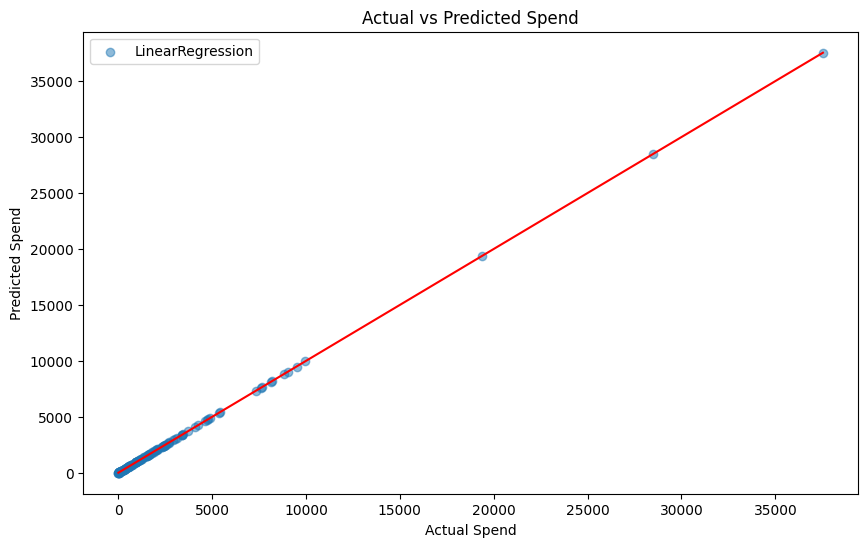

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr,label = 'LinearRegression', alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red')
plt.xlabel('Actual Spend')
plt.ylabel('Predicted Spend')
plt.legend()
plt.title('Actual vs Predicted Spend')
plt.show()
